<a href="https://colab.research.google.com/github/Aadhi7310/McD/blob/main/Fastfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the required libraries and dataset

In [2]:
fast_data = pd.read_csv('mcdonalds.csv')
fast_data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


The first 5 data of the consumers are visible in the above table

In [3]:
fast_data.shape

(1453, 15)

The dataset consist of 1453 user response to 15 queries

In [4]:
fast_ratings = fast_data.iloc[:,0:11]
fast_ratings.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


Seperated the reaction of users from the overall dataset

In [5]:
fast_ratings = (fast_ratings == "Yes").astype(int)
fast_ratings.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Converted YES to 1 and NO to 0

In [6]:
col_means = np.round(np.mean(fast_ratings, axis=0), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
import sklearn
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
fast_pca = pca.fit_transform(fast_ratings)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)
summary = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': var,
    'Cumulative Proportion': cum_var
})
print(summary.round(4))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


Found the standard deviation,variance and cumulative proportion of the dataset

In [9]:
rot = pca.components_
print(rot)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [10]:
rotation = pd.DataFrame(rot, columns=fast_ratings.columns)
print(rotation)

       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.589622 -0.138241 -0.627799  0.140060   
8   0.572403   -0.018465  0.400280  -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284   -0.665818 -0.075634  -0.005338  0.008707  0.239532  0.428087   
10  0.045439   -0.541616  0.141730   0.250910  0.001642  0.339265 -0.489283   

       tasty  expensive   healthy  disgusting  
0  

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
fast_scaled = scaler.fit_transform(fast_ratings)
scores = pca.transform(fast_scaled)
print(scores)

[[ 1.44543356 -0.55222853  2.51789046 ...  0.42095792  1.10358587
  -0.83431238]
 [ 0.11111057  0.69346532 -0.30142477 ...  0.23158247  1.06461667
  -0.6987977 ]
 [ 1.20102724  1.46408373  0.96952008 ... -0.16545829  0.05787655
   1.08947724]
 ...
 [ 0.18929348  2.06713266  1.61020173 ...  0.08208949  0.17379586
   0.2961456 ]
 [-2.06288463 -0.14064767  2.6856336  ...  0.10557905  0.01951966
  -0.02424433]
 [ 3.97890741  0.53025434  1.22465225 ... -0.4634496  -1.22678649
  -1.05952615]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


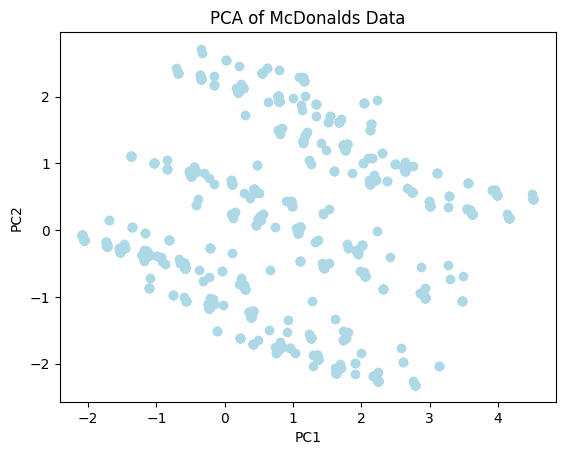

In [13]:
plt.scatter(scores[:, 0], scores[:, 1], color='lightblue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data')
plt.show()

In [14]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=0e9ca9e2d0fda439f04cac648b6a4c11879d88953765589926a64a801a32ceec
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


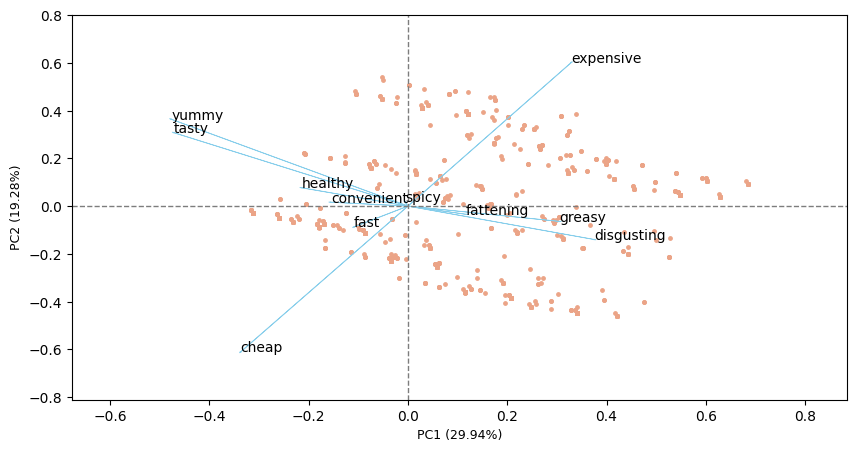

In [15]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=scores, loadings=pca.components_, labels=fast_ratings.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10,5))

The above plot shows the reaction of users we have to identify the cluster from here

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

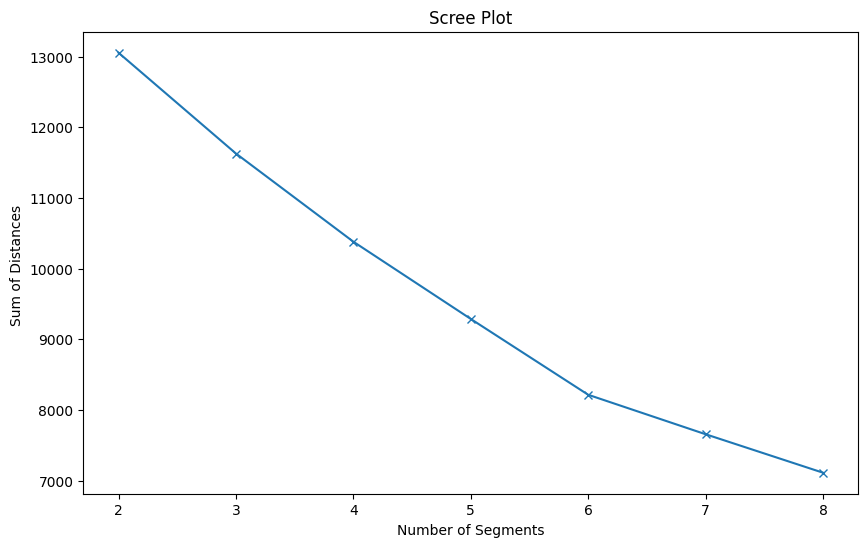

In [17]:
np.random.seed(1234)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(fast_ratings)

n_segments = range(2, 9)
kmeans_models = []

for n in n_segments:
    model = KMeans(n_clusters=n, n_init=10, random_state=1234)
    kmeans_models.append(model.fit(MD_x_scaled))


inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(10, 6))
plt.plot(n_segments, inertia, marker='x')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances ')
plt.title('Scree Plot')
plt.show()

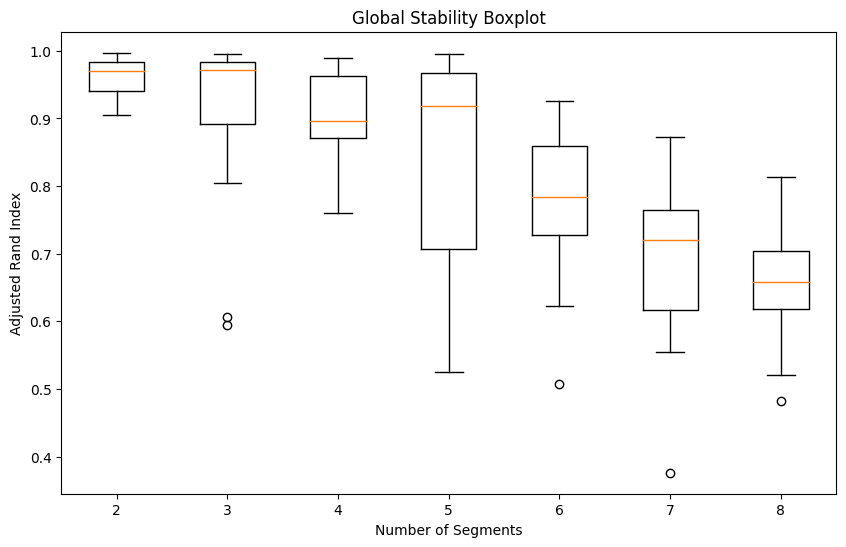

In [18]:
np.random.seed(1234)
def bootstrap_kmeans(X, n_clusters, n_init=10, nboot=25):
    rand_indices = []

    for _ in range(nboot):
        X_resampled = resample(X, random_state=np.random.randint(0, 10000))
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=np.random.randint(0, 10000))
        kmeans.fit(X_resampled)
        labels_resampled = kmeans.predict(X)

        kmeans_original = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=np.random.randint(0, 10000))
        kmeans_original.fit(X)
        labels_original = kmeans_original.labels_

        rand_index = adjusted_rand_score(labels_original, labels_resampled)
        rand_indices.append(rand_index)

    return rand_indices

n_segments_range = range(2, 9)
nrep = 10

stability_results = {}

for n_segments in n_segments_range:
    rand_indices = bootstrap_kmeans(fast_ratings, n_clusters=n_segments, n_init=nrep)
    stability_results[n_segments] = rand_indices

plt.figure(figsize=(10, 6))

data_to_plot = [stability_results[n] for n in n_segments_range]
plt.boxplot(data_to_plot, labels=n_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')

plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(fast_ratings)
fast_data['cluster_num'] = kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)

[2 0 0 ... 0 1 3]
1603.0604440558923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
fast_data['Like'].value_counts()


Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [21]:
fast_data['Like']=fast_data['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
fast_data['Like'].value_counts()

Like
+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [22]:
crosstab =pd.crosstab(fast_data['cluster_num'],fast_data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


In [23]:
cross_gen = pd.crosstab(fast_data['cluster_num'],fast_data['Gender'])
cross_gen

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


In [24]:
cross_freq = pd.crosstab(fast_data['cluster_num'],fast_data['VisitFrequency'])
cross_freq

VisitFrequency,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
cluster_num,,,,,,
0,78,20,4,122,66,33
1,129,32,6,238,134,41
2,75,1,56,46,23,103
3,60,1,65,33,12,75


In [27]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

fast_data['AgeRange'] = pd.cut(fast_data['Age'], bins=age_bins, labels=age_labels, right=False)

cross_age = pd.crosstab(fast_data['cluster_num'], fast_data['AgeRange'])

print(cross_age)

AgeRange     0-20  21-30  31-40  41-50  51-60  61+
cluster_num                                       
0               7     82     82     66     58   28
1              11    120    128     88    129  104
2               4     34     44     47     98   77
3               4     12     46     67     62   55


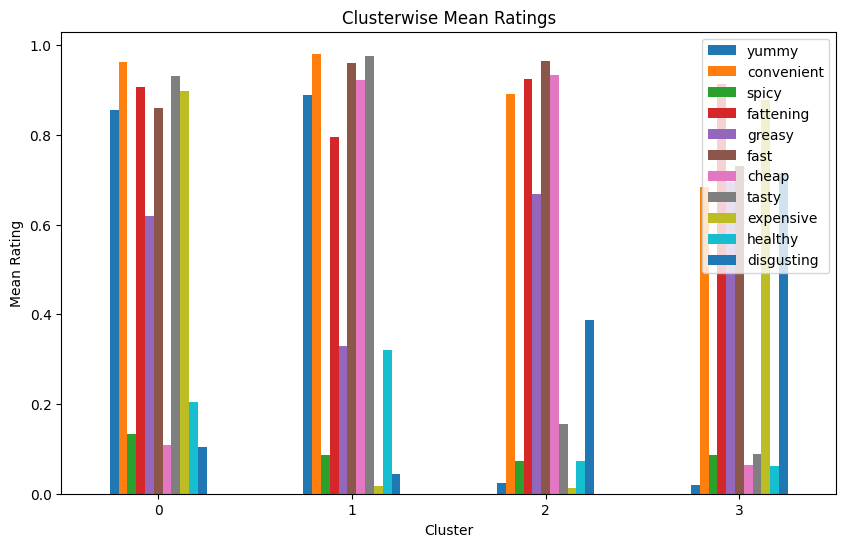

In [30]:
fast_ratings['cluster_num'] = fast_data['cluster_num']
cluster_means = fast_ratings.groupby('cluster_num').mean().iloc[:, 0:11]

cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Clusterwise Mean Ratings')
plt.xlabel('Cluster')
plt.ylabel('Mean Rating')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

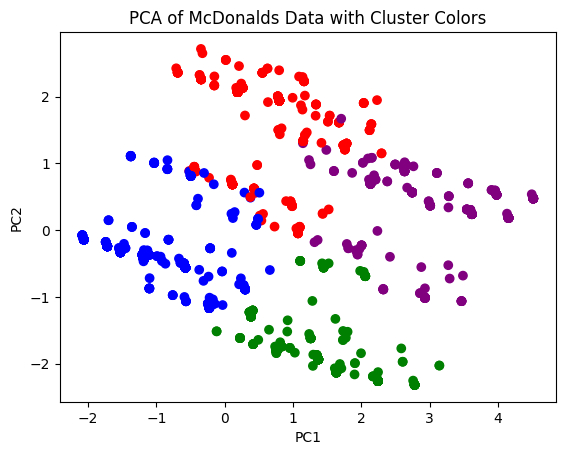

In [40]:
colors = ['red', 'blue', 'green', 'purple']
cluster_colors = [colors[i] for i in fast_data['cluster_num']]

# Scatter plot with cluster-specific colors
plt.scatter(scores[:, 0], scores[:, 1], c=cluster_colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data with Cluster Colors')
plt.show()

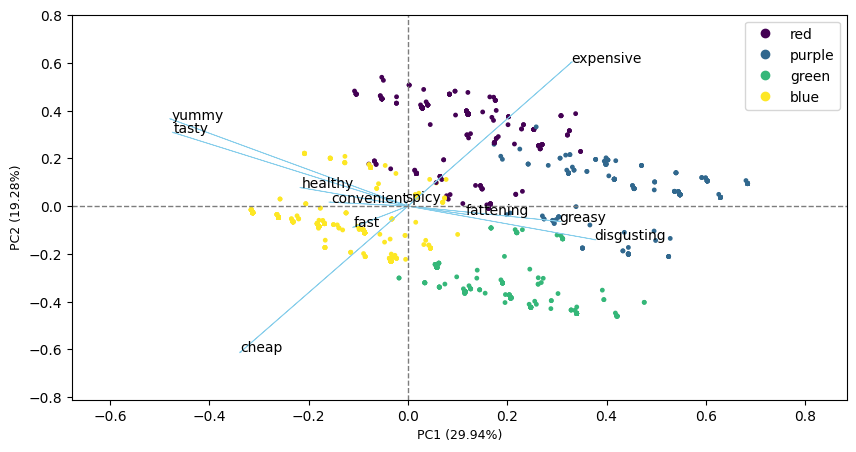

In [51]:
cluster.biplot(cscore=scores, loadings=pca.components_, labels=fast_ratings.columns.values,
               var1=round(pca.explained_variance_ratio_[0] * 100, 2),
               var2=round(pca.explained_variance_ratio_[1] * 100, 2),show = True, dim=(10, 5),
               colorlist=cluster_colors )